# A1Q2 cmpt423
Hongyi Xue 
hox294 
11187674

a)  Create a scatter plot for x vs y only

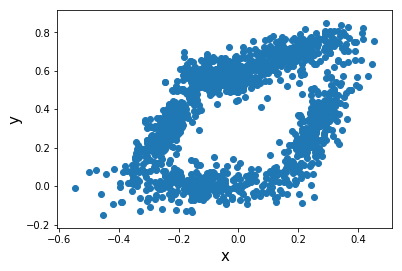

In [8]:
import numpy.random as nprand
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv('a1q2.csv', index_col=0)

x_list = df['x']
y_list = df['y']
plt.scatter(x_list, y_list)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

Comment: From the scatter plot, we can see that the points forms a "lip" shape. First, high density points at (-0.2, 0.2), then separate to two directions toward (-0.1, 0.6) and (0.1, 0.0). From (-0.1, 0.6) and (0.1, 0.0) toward (0.4, 0.8), high density along the line.

b)  Determine the mean and variance of x and y independently. Determine the covariance of x and y. Comment on how well (or poorly) these statistics describe the data. Produce a figure with all the data, along with the mean x and y value.

In [2]:

#clf = BernoulliNB()
#clf.fit(x_list, y_list)

#cvs_x = cross_val_score(clf, x_list, y_list, cv=10)
print('mean of x: ', np.mean(x_list))
print('variance of x', np.var(x_list))
print('mean of y:', np.mean(y_list))
print('variance of y', np.var(y_list))

print('covariance of x, y =', np.cov(x_list, y_list)[0][1])


mean of x:  2.6666934956528127e-12
variance of x 0.042983042307343726
mean of y: 0.36716912362000004
variance of y 0.06622214747899031
covariance of x, y = 0.02223514161337497


Comment: 1) The mean tells us the overall average value of all x & y values, but it does a poor job on describing points because no points is at the mean value poistion. 2)The variance measures how far each point in the set is from the mean, with the mean given, it gives us a picture about how far these points are from the center(which is the mean). 3) The covariance measures how the change of x affect the change of y. The covariance does not do much job to show the data here because: when x increases, y could be increasing a lot or very little. Same as y, when y increases, x could be inceasing a lot or very little.

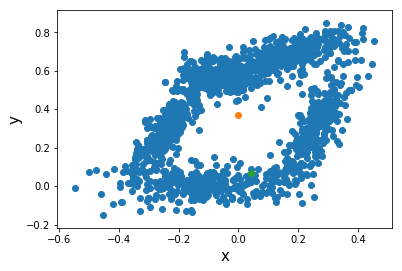

In [3]:
plt.scatter(x_list, y_list)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(np.mean(x_list), np.mean(y_list))
plt.scatter(np.var(x_list), np.var(y_list))
plt.show()

Comment: From the scatter plot, we can see that mean of x is 0 and variance of x is about 0.042. Which shows that in terms of x value, the average value is 0 and points are fairly close to that value. While the mean of y is 0.36 and variance of y is 0.068. Which means that in terms of y value, the average is 0.36 and points are relatively far from the average.

c) Create a scatter plot for x vs y using the label L as a class or category (each value for L would get a different colour and shape).

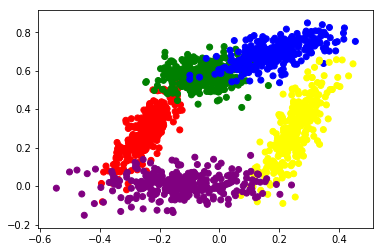

In [4]:
l_list = df['L']

colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.scatter(x_list, y_list, c=l_list, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

Comment: From this scatter plot we can clearly see there are 5 values for L. The change for points in different category become very close to linear. Which would allow us to do analysis on each categories.  

d) Determine the mean and variance of x and y independently for each category L. Determine the covariance of x and y for each category L.

In [5]:
for L in range(1, 6):
    ls = df[df.L == L]
    xs = ls['x']
    ys = ls['y']
    print('L =', str(L))
    print('mean of x =', np.mean(xs))
    print('variance of x =', np.var(xs))
    print('mean of y =', np.mean(ys))
    print('variance of y =', np.var(ys))
    print('covariance of x, y =', np.cov(xs, ys)[0][1])
    print(" ")


L = 1
mean of x = -0.2473983021766666
variance of x = 0.002779981091835438
mean of y = 0.27739348542666686
variance of y = 0.011187817353141333
covariance of x, y = 0.004392161420823166
 
L = 2
mean of x = -0.053646366273333315
variance of x = 0.005172089396166759
mean of y = 0.5721128869800002
variance of y = 0.0031698799194046436
covariance of x, y = 0.0003916219370547451
 
L = 3
mean of x = 0.17882616186333342
variance of x = 0.008622138859937097
mean of y = 0.6876240998766671
variance of y = 0.0035027932651528187
covariance of x, y = 0.003375855976190187
 
L = 4
mean of x = 0.25160730542999976
variance of x = 0.003623820131764915
mean of y = 0.29040125442333353
variance of y = 0.022880577630222887
covariance of x, y = 0.007160880253883685
 
L = 5
mean of x = -0.12938879883000007
variance of x = 0.018606835947597593
mean of y = 0.008313891393333333
variance of y = 0.002946282628737198
covariance of x, y = 0.00019471231519910872
 


Comment: For each value of L, the mean of x, y tell roughly where the group of pints are lacted. The variance of x, y tell how far these points speard in x and y directions. The covariance shows how the change of x will affect the value of y, which does a good job showing the data here because each group of points are in quite linear shape.

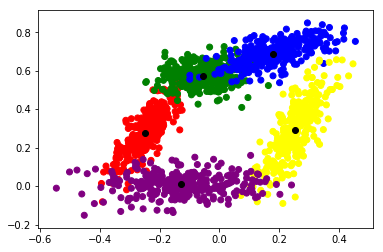

In [6]:
plt.scatter(x_list, y_list, c=l_list, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(-0.247398, 0.277393, c='black')
plt.scatter(-0.053646, 0.572112, c='black')
plt.scatter(0.178826, 0.687624, c='black')
plt.scatter(0.251607, 0.290401, c='black')
plt.scatter(-0.129388, 0.008313, c='black')
plt.show()

Comment: The mean values for each categories indicate the average value of each group. Although we have the idea of the average value of each category, the mean value does not show how points are spread in each group. We need variance and covariance to give us a more detail picture of the data.

(e) Using the scikit-learn libraries, fit a Gaussian Naive Bayes model to the x, y data using L as the goal or target category, using 75% of the data for training, and 25% of the data for testing. Produce a confusion matrix, showing predicted L vs actual L from the testing data.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
    
clf = GaussianNB()
xys = df[['x', 'y']] #what we want to predicted?
groups = df['L'] #target category

x_train, x_test, y_train, y_test= train_test_split(xys, groups, test_size=0.25)
clf.fit(x_train, y_train)

cvs = cross_val_score(clf, x_test, y_test, cv=10)

pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)



Accuracy 0.9173333333333333


array([[73,  3,  0,  0,  4],
       [ 1, 73,  5,  0,  0],
       [ 0,  8, 61,  1,  0],
       [ 0,  0,  3, 70,  2],
       [ 1,  0,  0,  3, 67]])

Comment: We can tell that the model does a pretty good job on predicting with accuracy = 93.1%. The confusion matrix shows the good prediction is on the diagonal, which is correct since L_true = L=predict on the diagonal.